In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(file) # 30,911 galaxies
df = df[df['Use'] == 1] # 13,299 galaxies
df = df[df['LIR'] > 0] # 8,486

z_bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

### Bolometric Luminosity vs Redshift

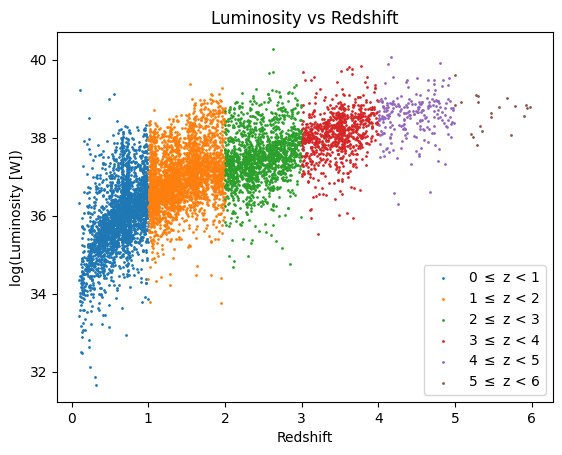

In [2]:
z = df['zpk'].values # redshift

lum = df['LIR'].copy().values # solar luminosity
lum *= 3.828 * 10 ** 26 # solar luminosity -> Watts

for z_start, z_end in z_bins:
    mask_z = (z >= z_start) & (z < z_end)
    plt.scatter(z[mask_z], np.log10(lum[mask_z]), s=1, label=f'{z_start} $\leq$ z < {z_end}')
plt.title('Luminosity vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('log(Luminosity [W])')
plt.legend()
plt.show()

### Bolometric Flux

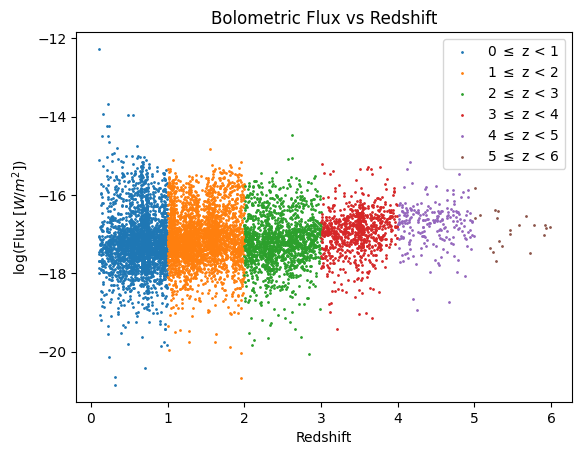

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
d = cosmo.luminosity_distance(z).to(u.m).value # m

F_bol = lum / (4 * np.pi * d ** 2) # W/m^2

for z_start, z_end in z_bins:
    mask_z = (z >= z_start) & (z < z_end)
    plt.scatter(z[mask_z], np.log10(F_bol[mask_z]), s=1, label=f'{z_start} $\leq$ z < {z_end}')
plt.title('Bolometric Flux vs Redshift')
plt.ylabel('log(Flux [$W/m^2$])')
plt.xlabel('Redshift')
plt.legend()
plt.show()

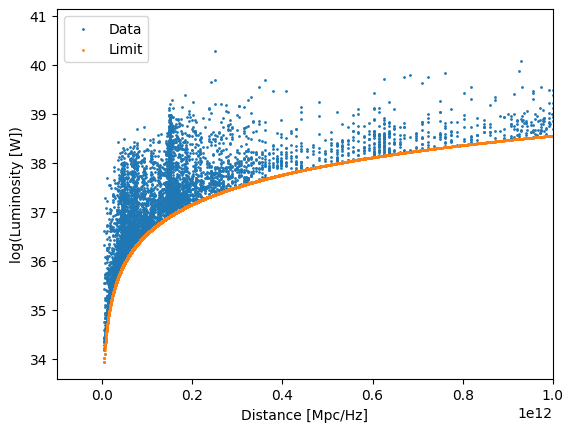

In [4]:
F24 = df['F24'].copy().values # mJy
F24 *= 10 ** -29 # mJy -> W/m^2/Hz

F_lim = 0.003 # mJy
F_lim *= 10 ** -29 # mJy -> W/m^2/Hz
mask_f = F24 > F_lim

dmax = np.sqrt(lum / (4 * np.pi * F_lim)) # sqrt(W / W/m^2/Hz) = sqrt(m^2/Hz) = m/sqrt(Hz)
dmax *= 3.241 * 10 ** -23 # m/sqrt(Hz) -> Mpc/sqrt(Hz)

d = np.sqrt(lum / (4 * np.pi * F24)) # sqrt(W / W/m^2/Hz) = sqrt(m^2/Hz) = m/sqrt(Hz)
d *= 3.241 * 10 ** -23 # m/sqrt(Hz) -> Mpc/sqrt(Hz)

plt.scatter(d[mask_f], np.log10(lum[mask_f]), s=1, label='Data')
plt.scatter(dmax[mask_f], np.log10(lum[mask_f]), s=1, label='Limit')
plt.ylabel('log(Luminosity [W])')
plt.xlabel('Distance [Mpc/Hz]')
plt.legend()
plt.xlim(-1e11, 1e12)
plt.show()

### Distance Differences

$$
L_{bol} = 4 \pi D^2 F
$$

$$
D = \sqrt{\frac{L_{bol}}{4 \pi F}}
$$

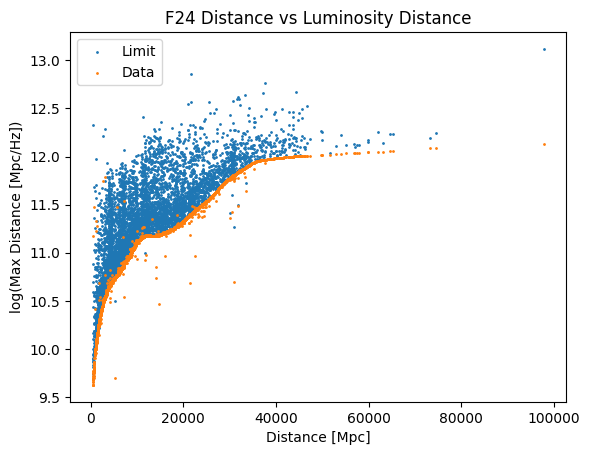

In [5]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
d_L = cosmo.luminosity_distance(z).value # Mpc

plt.scatter(d_L[mask_f], np.log10(dmax[mask_f]), s=1, label='Limit')
plt.scatter(d_L[mask_f], np.log10(d[mask_f]), s=1, label='Data')
plt.title('F24 Distance vs Luminosity Distance')
plt.ylabel('log(Max Distance [Mpc/Hz])')
plt.xlabel('Distance [Mpc]')
plt.legend()
plt.show()

### With F24 Limit

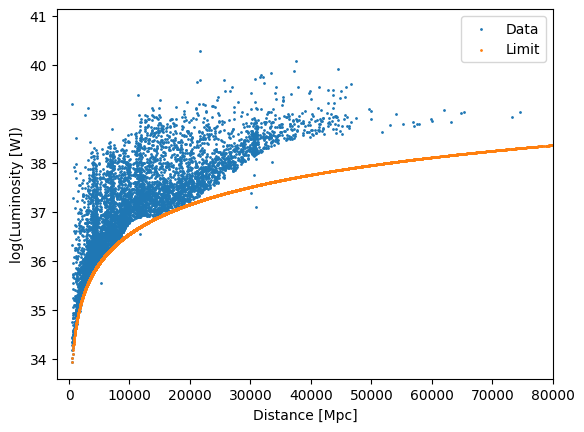

In [6]:
F_lim = 0.003 # mJy
mask_f = df['F24'] > F_lim
F_lim *= 10 ** -29 # mJy -> W/m^2/Hz
F_lim *= 10 ** 14 # mJy -> W/m^2

dmax = np.sqrt(lum / (4 * np.pi * F_lim)) # sqrt(W / W/m^2) = sqrt(m^2) = m)
dmax *= 3.241 * 10 ** -23 # m -> Mpc

plt.scatter(d_L[mask_f], np.log10(lum[mask_f]), s=1, label='Data')
plt.scatter(dmax[mask_f], np.log10(lum[mask_f]), s=1, label='Limit')
plt.ylabel('log(Luminosity [W])')
plt.xlabel('Distance [Mpc]')
plt.xlim(-2000, 80000)
plt.legend()
plt.show()

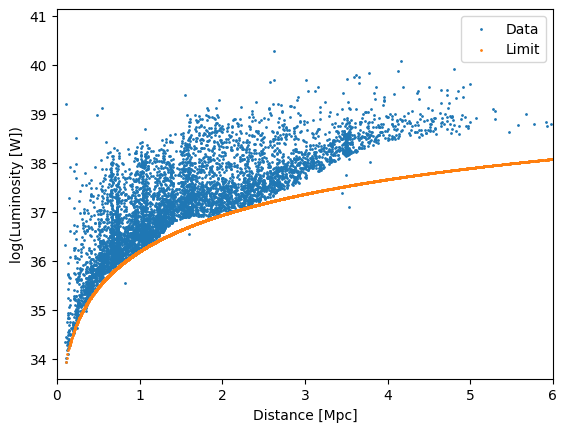

In [7]:
max_z = z_at_value(cosmo.luminosity_distance, dmax[mask_f] * u.Mpc)

plt.scatter(z[mask_f], np.log10(lum[mask_f]), s=1, label='Data')
plt.scatter(max_z, np.log10(lum[mask_f]), s=1, label='Limit')
plt.ylabel('log(Luminosity [W])')
plt.xlabel('Distance [Mpc]')
plt.xlim(0, 6)
plt.legend()
plt.show()